# This reads most recent iTunes reviews for the Zelle Purple app 

    - Reading customer reviews in JSON format, 
    - from the iTunes Store API,
    - using pandas python for data mining,
    - and outputs several word-cloud images

Created on 2019 Mar 1 by Edwin Campos

Last modification 2019 April 19 by ecampos.phd@gmail.com

In [1]:
# Dependencies
import pandas as pd
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Global variables
URL = 'http://itunes.apple.com/rss/customerreviews/id=1260755201/sortby=mostrecent/json'

In [3]:
# Ingest inputs
#response = requests.get(url)
df = pd.read_json(URL)#, orient='columns')
print(df)

                                                      feed
author   {'name': {'label': 'iTunes Store'}, 'uri': {'l...
entry    [{'author': {'uri': {'label': 'https://itunes....
icon      {'label': 'http://itunes.apple.com/favicon.ico'}
id       {'label': 'http://itunes.apple.com/rss/custome...
link     [{'attributes': {'rel': 'alternate', 'type': '...
rights              {'label': 'Copyright 2008 Apple Inc.'}
title          {'label': 'iTunes Store: Customer Reviews'}
updated             {'label': '2019-04-19T14:43:49-07:00'}


In [4]:
# Time stamp is not available for particular reviews, but for 10-pages aggregates
time_stamp = df.feed.updated['label']
print(time_stamp)

2019-04-19T14:43:49-07:00


In [5]:
#print(df.feed.entry)
reviews_df = pd.DataFrame()
for review in df.feed.entry:
    version= review['im:version']['label']
    rating = review['im:rating']['label']
    title  = review['title']['label']
    content= review['content']['label']
    
    data_dict = {'version': version, 'rating': int(rating),
                 'title': title,'content': content
                }
    #print(data_dict)
    new_row_pd = pd.Series(data_dict)
    '''
    new_row_pd = pd.Series({'version': version, 
                               'rating': rating,
                               'title': title,
                               'content': content
                              })
    '''
    #print(new_row_pd)
  
    reviews_df = reviews_df.append(new_row_pd, ignore_index=True)


In [6]:
print(reviews_df)

                                              content  rating  \
0   I can never get it to open in a timely manner....     1.0   
1   This I a terrible app. I would not use this ap...     1.0   
2   wonderful way to quickly send and receive monies!     5.0   
3   Have to keep typing in emails - paranoid if i ...     1.0   
4   Really fast and easy way to easy my money tran...     5.0   
5                                           Great app     5.0   
6   Can only transact a limited daily amount.  I’m...     2.0   
7   So don’t ever change your cell phone company a...     1.0   
8   Customer / user service is an absolute joke an...     1.0   
9   Better than cash app. Better than Venmo. Absol...     5.0   
10  Quickest way to pay a bill I owe. The funds go...     5.0   
11                     This app is so amazing love it     5.0   
12  Someone sent me money using this app. I tried ...     1.0   
13  The customer service is terrible and the app l...     1.0   
14  According to the webs

In [7]:
# Separate Positive and Negative Reviews
positive_reviews_df = reviews_df[reviews_df['rating'] >= 4]
count_positive_reviews = len(positive_reviews_df)
negative_reviews_df = reviews_df[reviews_df['rating'] <= 2]
count_negative_reviews = negative_reviews_df.shape[0]
sentiment_summary_text = ' %i positive reviews and %i negative reviews.' %\
                          (count_positive_reviews, count_negative_reviews)
print(sentiment_summary_text )


 20 positive reviews and 28 negative reviews.


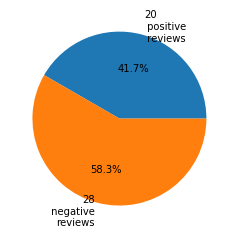

In [8]:
# Create a pie plot to see if the distribution is unbalanced
labels = str(count_positive_reviews)+'\n positive\n reviews', str(count_negative_reviews)+'\n negative\nreviews'
sizes = [count_positive_reviews, count_negative_reviews]
#plt.style.use('ggplot')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig('./AnalyzeSentimentDistrib.png')
plt.show()  
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

In [9]:
print(positive_reviews_df)

                                              content  rating  \
2   wonderful way to quickly send and receive monies!     5.0   
4   Really fast and easy way to easy my money tran...     5.0   
5                                           Great app     5.0   
9   Better than cash app. Better than Venmo. Absol...     5.0   
10  Quickest way to pay a bill I owe. The funds go...     5.0   
11                     This app is so amazing love it     5.0   
14  According to the website you able to change ac...     4.0   
16  This by far the BEST thing since sliced bread....     5.0   
24                           So easy to use, love it.     5.0   
25  I would be happy when they start accepting cas...     5.0   
26  This app is so convenient when you have family...     5.0   
37            This app is easy to use and very simple     5.0   
40                                    Very practical!     5.0   
41      Fast and easy,saves us from going to the bank     5.0   
43  Wow,this is a great a

## Use Ngrams to identify important two-words and three-words: Under Development

Reference: http://www.albertauyeung.com/post/generating-ngrams-python/

In [10]:
import re
from nltk.util import ngrams

In [11]:
s = "one two three four five"
s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
output = list(ngrams(tokens, 2))
print(output)

[('one', 'two'), ('two', 'three'), ('three', 'four'), ('four', 'five')]


## Use Lemmatiation to Standardize the signal words: Under Development

This is slower than Stemming, because looks at WordNet (database with semantic relationships among words)

References: 
    http://t-redactyl.io/blog/2017/06/text-cleaning-in-multiple-languages.html 
    https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
    https://wordnet.princeton.edu/
    

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer  # NLTK interface to Wordnet 
wordnet_lemmatizer = WordNetLemmatizer()# Initialize instance of WorldNetLemmatizer
# WordNet is a lexical database for the English language 
# aiming to stablish structured semantic relationships between words)

sentence = "He was running 10 km and eating 1 lb burger at same time! He has bad habit of swimming 500m after playing 2 hours in the Sun."
punctuations="?:!.,;"
numbers='123456789'
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
    if word in numbers:
        sentence_words.remove(word)
#sentence_words

print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    #print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))
    # Provide the Part-Of-Speech, 'v' for VERB lemmas, or 'n' for NOUN lemmas
    print("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word, pos="v")))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
10                  10                  
km                  km                  
and                 and                 
eating              eat                 
lb                  lb                  
burger              burger              
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
500m                500m                
after               after               
playing             play                
hours               hours               
in                  in                  
the             

In [13]:
# WordNet is a lexical database for the English language 
# aiming to stablish structured semantic relationships between words)

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer  # NLTK interface to Wordnet 
wordnet_lemmatizer = WordNetLemmatizer()# Initialize instance of WorldNetLemmatizer

def get_wordnet_pos(word):
    """Map Part-Of-Speech tag to a first character that lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

sentence = "He was running 10 km and eating 1 lb burger at same time! He has bad habit of swimming 500m after playing 2 hours in the Sun."
punctuations="?:!.,;'"
numbers='123456789'
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
    if word in numbers:
        sentence_words.remove(word)  # This is not working, we need to strip the numbers


print("{0:20}{1:20}".format("Word:","Lemma:"))
for word in sentence_words:
    print( "{0:20}{1:20}".format( word,
                                  wordnet_lemmatizer.lemmatize(word, pos=get_wordnet_pos(word)) ))

Word:               Lemma:              
He                  He                  
was                 be                  
running             run                 
10                  10                  
km                  km                  
and                 and                 
eating              eat                 
lb                  lb                  
burger              burger              
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
500m                500m                
after               after               
playing             play                
hours               hour                
in                  in                  
the             

In [14]:
print(len(positive_reviews_df.content))

20


In [15]:
def LemmatizeReviews(original_reviews):
    '''
    Inputs:
    original_reviews -- Original Text with Reviews, as a Pandas Series (dataframe column)
    Output:
    clean_reviews  -- Review lemmas, as a Pandas Series (dataframe column)
    '''
    from sklearn.feature_extraction import text
    MY_STOP_WORDS = sorted(['app', 'zelle', 'use', 'sucks', 'doesn', 'doesnt', 'thi', 'n\'t', \
                            'tri', 'suck', 'zell', 'just', 'doe', 'did', 'worst', 'zulle', 'zhelle', 'zelle', 'good'])
    ALL_STOP_WORDS = text.ENGLISH_STOP_WORDS.union(MY_STOP_WORDS)
    PUNCTUATIONS = "?:!.,;'"
    #number_of_reviews = len(original_reviews)
    lemmas_df = pd.DataFrame(columns=['lemmas'])
    #for review_number in range(number_of_reviews):
    for review in original_reviews:
        #print('Processing Review # %s' % review_number)
        #review = original_reviews.iloc[review_number]
        print('ORIGINAL REVIEW:', review)
        sentence_list = nltk.sent_tokenize(review)
        lemmatized_review = ''
        for sentence in sentence_list:
            print('ORIGINAL SENTENCE:', sentence)
            word_list = [word.lower() for word in nltk.word_tokenize(sentence)] # Make all tokens in small caps
            print('original word_list:', word_list)
            for word in word_list:
                print(word)
                # Remove Punctuation
                if word in PUNCTUATIONS:
                    print('Will remove this punctuation word:', word)
                    word_list.remove(word)
                # Remove Stop Words (To Be Done)
                elif word in ALL_STOP_WORDS:
                    print('Will remove this STOP word:', word)
                    word_list.remove(word)
                else:
                    loc = word_list.index(word)
                    word_list.remove(word)
                    lemma = wordnet_lemmatizer.lemmatize(word, pos=get_wordnet_pos(word))
                    print('Will replace this word with lemma:', lemma)                    
                    word_list.insert(loc, lemma)
            
            print(' cleaned word_list:', word_list)
            # Find Lemmas: Can I use word_list.replace(word,lemma) within the loop above?
            lemmatized_sentence = ' '.join([wordnet_lemmatizer.lemmatize(word, pos=get_wordnet_pos(word)) for word in word_list])
            #print('LEMMATIZED SENTENCE:',lemmatized_sentence)
            
            lemmatized_review = lemmatized_review.join(lemmatized_sentence)
            #print('lemmatized_review:',lemmatized_review)
        lemmas_df = lemmas_df.append({'lemmas': lemmatized_review}, ignore_index=True)        
        #print(lemmas_df.iloc[review_number])
        
    return lemmas_df

lemmas = LemmatizeReviews(positive_reviews_df.content)
print(lemmas)
# positive_reviews_df['lemmas'] = lemmas

ORIGINAL REVIEW: wonderful way to quickly send and receive monies!
ORIGINAL SENTENCE: wonderful way to quickly send and receive monies!
original word_list: ['wonderful', 'way', 'to', 'quickly', 'send', 'and', 'receive', 'monies', '!']
wonderful
Will replace this word with lemma: wonderful
way
Will replace this word with lemma: way
to
Will remove this STOP word: to
send
Will replace this word with lemma: send
and
Will remove this STOP word: and
monies
Will replace this word with lemma: monies
!
Will remove this punctuation word: !
 cleaned word_list: ['wonderful', 'way', 'quickly', 'send', 'receive', 'monies']
ORIGINAL REVIEW: Really fast and easy way to easy my money transfer problem bill get paid money owed paid it’s really nice all smiles 😁🙂
ORIGINAL SENTENCE: Really fast and easy way to easy my money transfer problem bill get paid money owed paid it’s really nice all smiles 😁🙂
original word_list: ['really', 'fast', 'and', 'easy', 'way', 'to', 'easy', 'my', 'money', 'transfer', 'prob

ORIGINAL REVIEW: makes my life easy
ORIGINAL SENTENCE: makes my life easy
original word_list: ['makes', 'my', 'life', 'easy']
makes
Will replace this word with lemma: make
my
Will remove this STOP word: my
easy
Will replace this word with lemma: easy
 cleaned word_list: ['make', 'life', 'easy']
ORIGINAL REVIEW: Great app plus it’s super convenient
ORIGINAL SENTENCE: Great app plus it’s super convenient
original word_list: ['great', 'app', 'plus', 'it', '’', 's', 'super', 'convenient']
great
Will replace this word with lemma: great
app
Will remove this STOP word: app
it
Will remove this STOP word: it
s
Will replace this word with lemma: s
super
Will replace this word with lemma: super
convenient
Will replace this word with lemma: convenient
 cleaned word_list: ['great', 'plus', '’', 's', 'super', 'convenient']
ORIGINAL REVIEW: Love the app but was surprised to learn there is a weekly limit on the amount you can send someone!
ORIGINAL SENTENCE: Love the app but was surprised to learn the

## Tokenization : Create a Bag Of Words

In [16]:
# Tokenization: Split text into tokens, in this case into individual words.
# Extract positive words
positive_words_string = positive_reviews_df.content.str.cat(sep=' ')
# Extract negative words
negative_words_string = negative_reviews_df.content.str.cat(sep=' ')

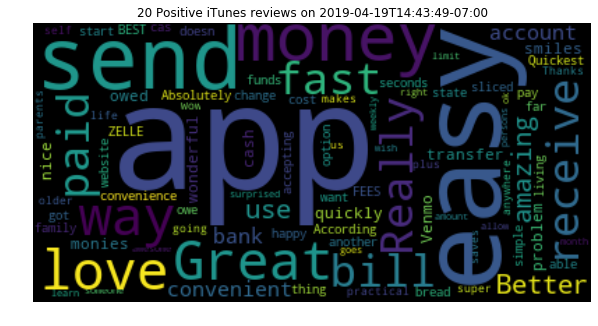

In [17]:
# Plot word-cloud image for Positive Reviews
positive_wordcloud = WordCloud().generate(positive_words_string)

plt.figure(figsize=(10,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('%i Positive iTunes reviews on %s' % (count_positive_reviews, time_stamp) )
plt.savefig('./AnalyzeSentimentPositive.png')
plt.show()
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

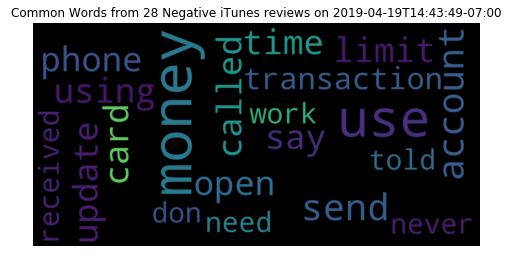

In [18]:
# Plot word-cloud image for Negative Reviews, with custom arguments
from wordcloud import STOPWORDS  # This contains trivial words to ignore
my_stop_words = set(['zelle', 'bank', 'app']) | STOPWORDS 
negative_wordcloud = WordCloud(width=1600, height=800, 
                               max_font_size=200,
                               max_words=20, 
                               stopwords=my_stop_words,
                              ).generate(negative_words_string)

plt.figure(figsize=(8,8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Common Words from %i Negative iTunes reviews on %s' % (count_negative_reviews, time_stamp) )

plt.savefig('./AnalyzeSentimentNegative.png')
plt.show()  
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

## This section is under development

Will create a new column positive_reviews_df['cleaned content'] = as_a_function_of(positive_reviews_df.content)

Reference: http://t-redactyl.io/blog/2017/06/text-cleaning-in-multiple-languages.html

Try to filter irrelevant words first, then use stop_words=None when Count Vectorizing.

In [19]:
from sklearn.feature_extraction import text
MY_STOP_WORDS = sorted(['app', 'zelle', 'use', 'sucks', 'doesn', 'doesnt', 'thi', 'n\'t', \
                         'tri', 'suck', 'zell', 'just', 'doe', 'did', 'worst', 'zulle', 'zhelle', 'zellle', 'good'])
ALL_STOP_WORDS = text.ENGLISH_STOP_WORDS.union(MY_STOP_WORDS)

In [20]:
# Create or Refresh output files
KEEP_WORDS_FILE = './words_kept.txt'
REMOVED_AND_STEMMED_WORDS_FILE = './words_removed_or_stemmed.txt'

with open(KEEP_WORDS_FILE, 'w+'): pass
with open(REMOVED_AND_STEMMED_WORDS_FILE, 'w+'): pass

In [21]:
# Delete this snipet
print(type(positive_words_string), positive_words_string)
print(type(ALL_STOP_WORDS),ALL_STOP_WORDS)

<class 'str'> wonderful way to quickly send and receive monies! Really fast and easy way to easy my money transfer problem bill get paid money owed paid it’s really nice all smiles 😁🙂 Great app Better than cash app. Better than Venmo. Absolutely NO FEES. EVER. Quickest way to pay a bill I owe. The funds got there in seconds. This app is so amazing love it According to the website you able to change accounts on the app but it doesn’t have that option This by far the BEST thing since sliced bread.  The convenience of ZELLE is AMAZING. So easy to use, love it. I would be happy when they start accepting cas app. This app is so convenient when you have family living in another state and want to send money at no cost This app is easy to use and very simple Very practical! Fast and easy,saves us from going to the bank Wow,this is a great app for older parents like my self I can send and receive money from anywhere.....Thanks.... makes my life easy Great app plus it’s super convenient Love the

In [22]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer("english").stem("generously")  # Will return "generous"

'generous'

## Compute Term-Frequency Inverse-Document-Frequency (TF IDF) metric

For a tutorial on the theory of TF-IDF, see for example section 2.2.2 in https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf

    from sklearn.feature_extraction.text import TfidfVectorizer

Remember to vectorize the word counts: Use a CountVectorizer, which converts a collection of text documents to a matrix of the counts of occurences of each word in the document.

Remember to sort the input (word, weight) by descending weights.

In [23]:
# Compute TF-IDF weights for POSITIVE Reviews
tfidfWords = TfidfVectorizer()
tfidfWords.fit_transform(positive_reviews_df.content)
tfidf_poswords_weights_dict = {'words':tfidfWords.get_feature_names(), 
                               'weights':tfidfWords.idf_}
#print(tfidf_poswords_weights_dict)

In [24]:
# Generate Pandas dataframes with the TF-IDF values
tfidf_poswords_weights_df = pd.DataFrame(tfidf_poswords_weights_dict)
print(tfidf_poswords_weights_df.head(10))
tfidf_poswords_weights_df_sorted = tfidf_poswords_weights_df.sort_values(by=['weights'],
                                                                         ascending=False)
print(tfidf_poswords_weights_df_sorted.head(10))

        words   weights
0        able  3.351375
1  absolutely  3.351375
2   accepting  3.351375
3   according  3.351375
4     account  3.351375
5    accounts  3.351375
6         all  3.351375
7       allow  3.351375
8     amazing  2.945910
9      amount  3.351375
        words   weights
0        able  3.351375
73       owed  3.351375
85      right  3.351375
83     really  3.351375
82    quickly  3.351375
81   quickest  3.351375
80    problem  3.351375
79  practical  3.351375
78       plus  3.351375
77    persons  3.351375


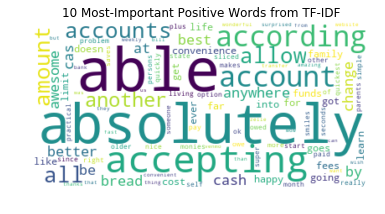

In [25]:
# Create image for Positive Reviews, with word size based on TF-IDF weight
poswords_dict = dict(zip(tfidf_poswords_weights_df['words'], 
                         tfidf_poswords_weights_df['weights'])
                    )
positive_wordcloud_tfidf = WordCloud(max_words=100, 
                                     background_color='white'
                                    ).generate_from_frequencies(poswords_dict) 

plt.figure()
plt.title("10 Most-Important Positive Words from TF-IDF")
plt.imshow(positive_wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentPositiveTFIDF.png')
plt.show()

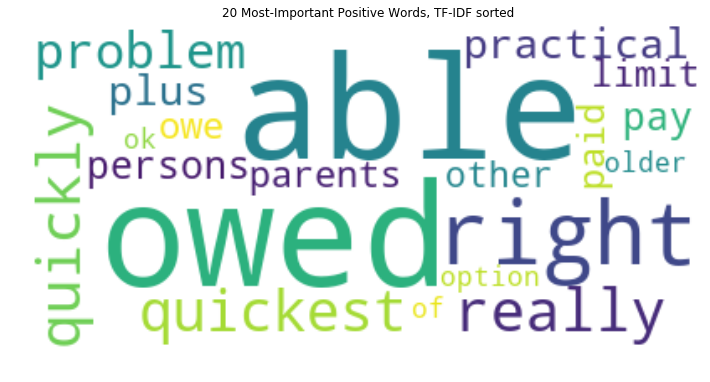

In [26]:
# Create image for Positive Reviews, with words sorted by weights
poswords_sort_dict = dict(zip(tfidf_poswords_weights_df_sorted['words'], 
                              tfidf_poswords_weights_df_sorted['weights'])
                         )
# Create image for Positive Reviews, with word size based on TF-IDF weight
positive_wordcloud_tfidf_sort = WordCloud(max_words=20, 
                                          background_color='white'
                                         ).generate_from_frequencies(poswords_sort_dict) 

plt.figure(figsize=(12,8))
plt.title("20 Most-Important Positive Words, TF-IDF sorted")
plt.imshow(positive_wordcloud_tfidf_sort, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentPositiveTFIDF_sort.png')
plt.show()

In [27]:
# Compute TF-IDF weights for NEGATIVE Reviews
tfidfWords = TfidfVectorizer()
tfidfWords.fit_transform(negative_reviews_df.content)
tfidf_negwords_weights_dict = {'words':tfidfWords.get_feature_names(), 
                               'weights':tfidfWords.idf_}
#print(tfidf_negwords_weights_dict)

In [28]:
tfidf_negwords_weights_df = pd.DataFrame(tfidf_negwords_weights_dict)
print(tfidf_negwords_weights_df.head(10))

tfidf_negwords_weights_df_sorted = tfidf_negwords_weights_df.sort_values(by=['weights'],
                                                                         ascending=False)
print(tfidf_negwords_weights_df_sorted.head(10))

      words   weights
0        10  3.674149
1       100  3.674149
2        15  3.674149
3      1600  3.674149
4      2013  3.674149
5      2min  3.674149
6        50  3.674149
7      able  2.981001
8     about  3.268684
9  absolute  3.674149
        words   weights
0          10  3.674149
254       old  3.674149
270      part  3.674149
269  paranoid  3.674149
268       own  3.674149
267      over  3.674149
265       our  3.674149
264    others  3.674149
261   options  3.674149
257   ongoing  3.674149


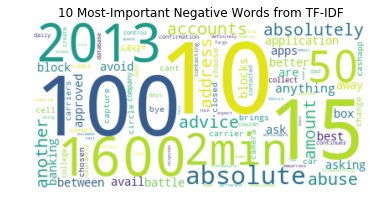

In [29]:
# Plot 100 rare words from TF-IDF 
negwords_dict = dict(zip(tfidf_negwords_weights_dict['words'], 
                         tfidf_negwords_weights_dict['weights'])
                    )
negative_wordcloud_tfidf = WordCloud(max_words=100, 
                                     background_color='white'
                                    ).generate_from_frequencies(negwords_dict) 
plt.figure()
plt.title("10 Most-Important Negative Words from TF-IDF")
plt.imshow(negative_wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentNegativeTFIDF.png')
plt.show()

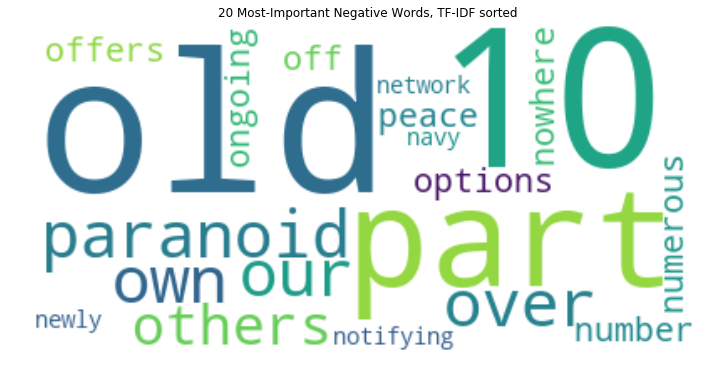

In [30]:
# Create image for Negative Reviews, with words sorted by weights
negwords_sort_dict = dict(zip(tfidf_negwords_weights_df_sorted['words'], 
                              tfidf_negwords_weights_df_sorted['weights'])
                         )
# Create image for Negative Reviews, with word size based on TF-IDF weight
negative_wordcloud_tfidf_sort = WordCloud(max_words=20, 
                                          background_color='white'
                                         ).generate_from_frequencies(negwords_sort_dict) 
plt.figure(figsize=(12,8))
plt.title("20 Most-Important Negative Words, TF-IDF sorted")
plt.imshow(negative_wordcloud_tfidf_sort, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentNegativeTFIDF_sort.png')
plt.show()

## Future Work
1. In another notebook (PredictSentiment), I will train a Logistic Regression model to predict sentiment.